![Header Image](./header.png)


# __Table of Contents__
1. [Introduction](#Introduction)
2. [Necessary Imports](#Necessary-Imports)
3. [Configuration](#Configuration)
4. [Data Exploration](#Data-Exploration)
5. [Data Cleaning](#Data-Cleaning)
6. [Feature Engineering](#Feature-Engineering)
7. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
   - [Univariate Analysis](#1.-Univariate-Analysis)
   - [Bivariate Analysis](#2.-Bivariate-Analysis)
   - [Multivariate Analysis](#3.-Multivariate-Analysis)
8. [Business Questions](#Business-Questions)
9. [Time Series Analysis](#Time-Series-Analysis)
   - [TSC Analysis on Daily Basis](#Daily-Basis)
   - [TSC Analysis on Weekly Basis](#Weekly-Basis)
   - [TSC Analysis on Monthly Basis](#Monthly-Basis)
   - [TSC Analysis on Quarterly Basis](#Quarterly-Basis)
   - [TSC Analysis on Half Year Basis](#Half-Year-Basis)
   - [TSC Analysis on Yearly Basis](#Yearly-Basis)
10. [Time Series Forecasting](#Time-Series-Forecasting)
    - [Augmented Dicky Fuller Test (Test For Stationarity)](#Augmented-Dicky-Fuller-Test-(TestTestForStationarity))
    - [Forecasting with SARIMA Model](#Forecasting-with-SARIMA-Model)
11. [Hypothesis Testing](#Hypothesis-Testing)
    - [Sales / Product Category Hypothesis](#1.-Sales-/-Product-Category-Hypothesis)
    - [Customer Segment Hypothesis](#2.-Customer-Segment-Hypothesis)
12. [Analytics Report](#-analysis-report)

## __Introduction__
The dataset represents sales data from superstores, capturing information on customer purchases across various product categories and regions. Each row documents a specific sale, detailing the customer’s information, order and shipping dates, product categories, and sales amounts. The dataset includes sales made to different customer segments , providing insight into regional sales performance, product trends, and shipping preferences. We gonna analyze and try to fetch useful insights.

### __Columns:__
#### __1. Numerical Columns:__
- `Row ID` A unique identifier for each record.
- `Postal Code` The postal code for the customer's shipping address.
- `Sales` The total sales amount for the transaction.
#### __2. Categorical (Object) Columns:__
- `Customer ID` A unique identifier for each customer.
- `Order ID` The unique ID assigned to each order placed.
- `Product ID` A unique identifier for the product that was purchased.
- `Customer Name` The name of the customer who placed the order.
- `Segment` The customer segment (e.g., Corporate, Consumer, Home Office) that categorizes the type of buyer.
- `Country` The country where the customer is located (in this case, all are in the United States).
- `City` The city of the customer's shipping address.
- `state` The state of the customer's shipping address.
- `Region` The geographical region of the shipping location (e.g., East, West, South).
- `Category` The category to which the purchased product belongs (e.g., Technology, Furniture, Office Supplies).
- `Sub Category` The sub-category of the purchased product (e.g., Phones, Binders, Furnishings).
- `Ship Mode` The shipping method chosen for the order (e.g., First Class, Second Class, Standard Class).
- `Product Name` The name of the specific product purchased.
#### __3. Temporal (DateTime) Columns:__
- `Order Date` The date on which the order was placed.
- `Ship Date` The date when the order was shipped.


## __Necessary Imports__

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import warnings
import itertools
import ipywidgets as widgets
from skimpy import clean_columns

## __Configuration__

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set_theme(style="whitegrid")
pio.templates.default = 'plotly_white' 

## __Data Exploration__

In [86]:
# Getting Data From Csv Dataset File
sales = pd.read_csv("sales.csv")

In [87]:
# Make column names consistant and clean
sales = clean_columns(sales)

In [88]:
# First 5 Rows
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [89]:
# Last 5 Rows
sales.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [90]:
# 5 Sample Rows
sales.sample(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2960,2961,CA-2018-143665,26/04/2018,01/05/2018,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Seattle,Washington,98115.0,West,OFF-PA-10003673,Office Supplies,Paper,Strathmore Photo Mount Cards,20.340
4215,4216,CA-2015-103590,30/11/2015,04/12/2015,Standard Class,JL-15505,Jeremy Lonsdale,Consumer,United States,Mount Vernon,New York,10550.0,East,OFF-EN-10004007,Office Supplies,Envelopes,Park Ridge Embossed Executive Business Envelopes,62.280
2981,2982,CA-2015-131310,12/07/2015,18/07/2015,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10001797,Furniture,Chairs,"Safco Chair Connectors, 6/Carton",123.136
3025,3026,CA-2016-164441,08/11/2016,13/11/2016,Standard Class,AC-10450,Amy Cox,Consumer,United States,New York City,New York,10011.0,East,OFF-PA-10001667,Office Supplies,Paper,Great White Multi-Use Recycled Paper (20Lb. an...,17.940
3606,3607,CA-2017-119683,12/03/2017,16/03/2017,Second Class,CK-12595,Clytie Kelty,Consumer,United States,New York City,New York,10024.0,East,OFF-EN-10001099,Office Supplies,Envelopes,Staple envelope,29.340


In [91]:
# Shape of Dataset (Rows x Columns)
row, col = sales.shape
print(f"Rows : {row}")
print(f"Columns : {col}")

Rows : 9800
Columns : 18


In [92]:
# Information about dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub_category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

In [93]:
# Dropping row_id column
sales.drop(columns='row_id', inplace=True)

#### __Making Date(Object) Columns to Datetime__

In [11]:
sales['order_date'] = pd.to_datetime(sales['order_date'], dayfirst=True)
sales['ship_date'] = pd.to_datetime(sales['ship_date'], dayfirst=True)

#### __Making Object Columns -> Categorical__

In [12]:
sales['category'] = sales['category'].astype('category')
sales['sub_category'] = sales['sub_category'].astype('category')
sales['ship_mode'] = sales['ship_mode'].astype('category')
sales['segment'] = sales['segment'].astype('category')
sales['country'] = sales['country'].astype('category')
sales['region'] = sales['region'].astype('category')

## __Data Cleaning__

In [13]:
# Checking For Duplicates
sales.duplicated().sum()

1

In [14]:
# Viewing Duplicated Rows
sales[sales.duplicated(keep=False)]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,,,
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3407,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [15]:
# Droping Row No 3407
sales.drop(3407, inplace=True)

In [16]:
# Checking For Null/ Missing Values
sales.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

In [84]:
# Make postal_code column  to string(object) istead of float64
sales['postal_code'] = sales['postal_code'].fillna(0).astype('str')

In [18]:
# Filling Missing Data with postal_code of "Vermont" 
sales.loc[sales['postal_code']== '0', 'postal_code'] = '05401'

In [19]:
# To keep postal_code 5 digit consistent
sales['postal_code'] = sales['postal_code'].str.zfill(5)
sales['postal_code'] = sales['postal_code'].str.split('.').apply(lambda x: x[0])

In [20]:
# Rounding off sales column values to 2 digits
sales['sales'] = sales['sales'].round(2)

In [21]:
# Checking consistency of order_id
sales['order_id'].str.match(r'^[A-Z0-9-]+$').all()

True

In [22]:
# checking  consistency of customer_id
sales['customer_id'].str.match(r'^[A-Z]{2}-[0-9]{5}$').all()

False

In [23]:
# Making customer_id's pattern consistent
sales['customer_id'] = sales['customer_id'].apply(lambda x : x[0] + x[1:2].upper() + x[2:])

In [24]:
# Checking consistency of product_id
sales['product_id'].str.match(r'^[A-Z]{3}-[A-Z]{2}-\d{8}$').all()

True

## __Feature Engineering__

In [25]:
# sorting data by order_date in ascending order
sales.sort_values('order_date', inplace=True)

In [26]:
# Reindexing to make index continuous due to above row removal
sales.reset_index(drop=True, inplace=True)

In [27]:
# adding order_year column
sales.insert(2, 'order_year', sales['order_date'].dt.year)

In [28]:
# adding order_month column
sales.insert(3, 'order_month', sales['order_date'].dt.strftime('%b'))

In [29]:
# make month_names ordered 
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales['order_month'] = pd.Categorical(sales['order_month'], categories=month_order, ordered=True)

In [30]:
# adding ship_year column
sales.insert(5, 'ship_year', sales['ship_date'].dt.year)

In [31]:
# adding ship_month column
sales.insert(6, 'ship_month', sales['ship_date'].dt.strftime('%b'))

In [32]:
# adding delivery_days column
sales.insert(7, 'delivery_days', (sales['ship_date']-sales['order_date']).dt.days)

<h2 id="7-exploratory-data-analysis"><strong>Exploratory Data Analysis (EDA)</strong></h2>


In [33]:
# Statistical summary of useful Numerical columns 
sales[['delivery_days', 'sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
delivery_days,9799.0,3.961118,1.749703,0.00,3.00,4.00,5.00,7.00
sales,9799.0,230.763872,626.683648,0.44,17.25,54.48,210.57,22638.48


In [34]:
# skewness
print('Skewness of  delivery_days: ', round(sales['delivery_days'].skew(),2))
print('Skewness of  sales        : ', round(sales['sales'].skew(),2))

Skewness of  delivery_days:  -0.43
Skewness of  sales        :  12.98


### 1. __Univariate Analysis__


#### • __Numerical Column__

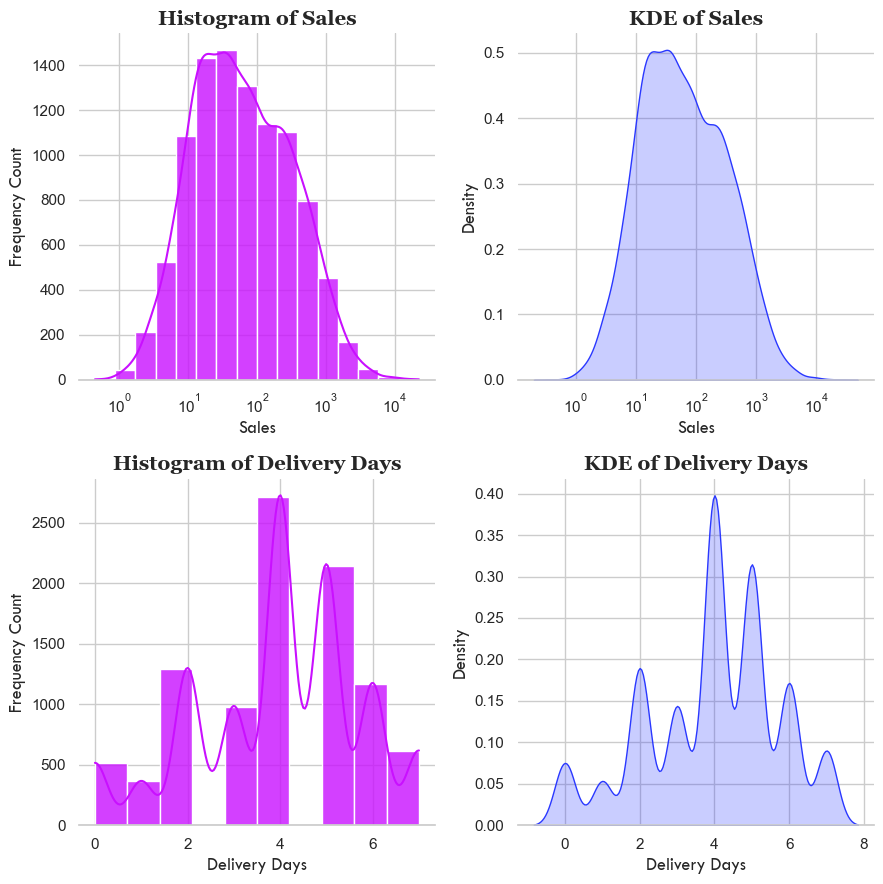

In [35]:
# Histograms and KDE plots
fig, ax = plt.subplots(2,2, figsize=(9,9))
sns.histplot(sales, x='sales', kde=True, binwidth=0.3, color='#c910ff', bins=20, log_scale=True, ax=ax[0,0], alpha=0.8)
sns.histplot(sales, x='delivery_days', kde=True, color='#c910ff', bins=10, ax=ax[1,0], alpha=0.8)
sns.kdeplot(sales, x='sales',log_scale=True,color='#2a38ff', fill=True, ax=ax[0,1], warn_singular=False)
sns.kdeplot(sales, x='delivery_days', color='#2a38ff', fill=True, ax=ax[1,1], warn_singular=False)
    
ax[0,0].set_title(f'Histogram of Sales',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[0,0].set_xlabel('Sales', fontsize=13,  fontname = 'Tw Cen MT')
ax[0,0].set_ylabel('Frequency Count', fontsize=13,  fontname = 'Tw Cen MT')

ax[0,1].set_title(f'KDE of Sales',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[0,1].set_xlabel('Sales', fontsize=13,  fontname = 'Tw Cen MT')
ax[0,1].set_ylabel('Density', fontsize=13,  fontname = 'Tw Cen MT')

ax[1,0].set_title(f'Histogram of Delivery Days',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[1,0].set_xlabel('Delivery Days', fontsize=13,  fontname = 'Tw Cen MT')
ax[1,0].set_ylabel('Frequency Count', fontsize=13,  fontname = 'Tw Cen MT')

ax[1,1].set_title(f'KDE of Delivery Days',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[1,1].set_xlabel('Delivery Days', fontsize=13, fontname = 'Tw Cen MT')
ax[1,1].set_ylabel('Density', fontsize=13, fontname = 'Tw Cen MT')

sns.despine(left=True)
plt.tight_layout()
plt.show()

#### • __Categorical Column__

In [36]:
# Donut Charts
cols = ['Ship Mode', 'Segment', 'Category', 'Sub Category', 'City', 'State', 'Region']
@widgets.interact(Columns=cols)
def uni_donut_chart(Columns):
    col = Columns.lower().replace(' ','_')
    x= sales[col].value_counts()
    if len(x) > 10:
        top = x.head(10) / x.sum()
        top *= 100
    else: 
        top = x  
    fig = px.pie(names=top.index, values=top.values, hole=0.62, color_discrete_sequence=px.colors.sequential.RdBu[:5])
    fig.update_traces(hovertemplate='%{label}: <br>%{value} observations')
    fig.update_layout(title={'text':f"{Columns} viz Contribution to Total Sales",'y':0.10, 'x':0.46, 'font': {
            'family': "Georgia",'size': 20, 'color': "black", 'weight':'bold'}}, width=800, height=500 )
    fig.show()

interactive(children=(Dropdown(description='Columns', options=('Ship Mode', 'Segment', 'Category', 'Sub Catego…

#### __Findings__:
- Sales column has `very positively skewed` data distribution.  Products with lower price (price range 10-1000 USD) were purchased by a lot of customers  rather than products with higher price (price > 1000 USD) bought by small number of cutomers. 
- Most of products were delivered in 4/5 days. Moreover it also reveals a lot of customers opt for `Standard Class` that comprises 3-7 days delivery time than `Second Class` taking 2 days.
- Majority of customer are general `consumers`.
- Majority sales of products include `office supplies` category products, and key product sub categories as `Binders`, `Paper`, `Furnishing` etc
- Most of sales seen in `California` state based, while city based sales high in `New York`, `Los Angeles`, `Philadelphia`, `San Francisco` etc

### 2. __Bivariate Analysis__

#### • __Numerical - Numerical Columns__

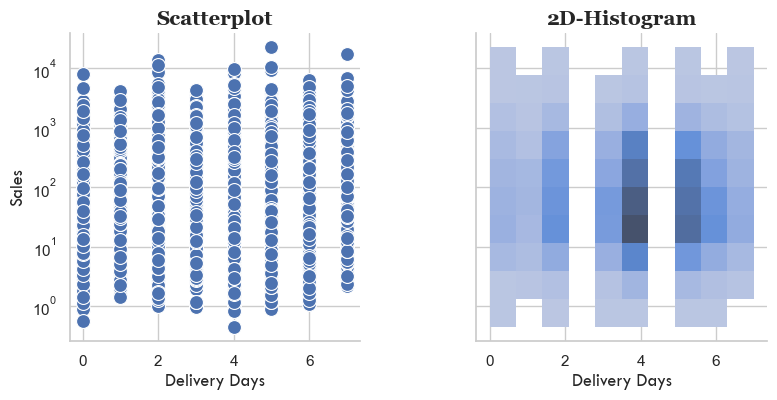

In [37]:
# Scatter plots and 2D-Histograms
fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
sns.scatterplot(sales, x='delivery_days', y='sales', ax=ax[0], s=100)
sns.histplot(sales, x='delivery_days', y='sales', log_scale=(False, True), ax=ax[1], bins=10)

ax[0].set_title('Scatterplot',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[0].set_xlabel('Delivery Days', fontsize=13, fontname = 'Tw Cen MT')
ax[0].set_ylabel('Sales', fontsize=13, fontname = 'Tw Cen MT')
ax[0].set_yscale('log')
ax[1].set_title('2D-Histogram',fontdict={'fontsize': 14.7, 'fontweight': 'bold', 'fontname': 'Georgia'})
ax[1].set_xlabel('Delivery Days', fontsize=13, fontname = 'Tw Cen MT')
ax[1].set_ylabel('Sales', fontsize=13, fontname = 'Tw Cen MT')

sns.despine()
plt.subplots_adjust(wspace=0.4)
plt.show()

In [38]:
# Correlation between delivery_days and sales
sales[['delivery_days', 'sales']].corr()

,delivery_days,sales
delivery_days,1.000000,-0.005712
sales,-0.005712,1.000000


#### • __Numerical - Categorical Columns__

In [39]:
# Bar Charts and Box Plots
num_cols = ['Sales', 'Delivery Days']
cat_cols = ['Ship Mode', 'Segment', 'Category', 'Sub Category', 'City', 'State', 'Region']

@widgets.interact(Category=cat_cols, Column=num_cols)
def num_cat_bivar(Category, Column):
    Category_clean = Category.lower().replace(' ', '_')
    Column_clean = Column.lower().replace(' ', '_')
    if Column_clean == 'sales':
        data = sales.groupby(Category_clean, as_index=False)[[Column_clean]].sum().sort_values(Column_clean, ascending=False).head(5)
        data1 = sales[sales[Category_clean].isin(data[Category_clean])]
    else:
        data = sales.groupby(Category_clean, as_index=False)[[Column_clean]].mean().sort_values(Category_clean, ascending=False)
        data2 = sales[sales[Category_clean].isin(data[Category_clean].head(5))]
        if data.shape[0]<5:
            data = data.head()
        else:
            data = data.sample(5)
    fig, ax = plt.subplots(1,2, figsize=(9, 4))
    ax[0].bar(data[Category_clean], data[Column_clean], label=data[Category_clean], color='#2a38ff',alpha=0.9)
    if Column_clean == 'sales':
        ax[0].set_title(f'Top Sales Across {Category}', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontname': 'Georgia'})
        sns.boxplot(data1, x=Category_clean, y=Column_clean, ax=ax[1], log_scale=True, color='#c910ff')
    else:
        ax[0].set_title(f'AVG Delivery Days Across {Category}', fontdict={'fontsize': 13, 'fontweight': 'bold', 'fontname': 'Georgia'})
        sns.boxplot(data2, x=Category_clean, y=Column_clean, ax=ax[1], color='#c910ff')
        
    
    ax[0].set_xlabel(f'{Category}', fontsize=13, fontname='Tw Cen MT')
    ax[0].set_ylabel(f'{Column}', fontsize=13, fontname='Tw Cen MT')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].set_title(f'Distribution Across {Category}', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontname': 'Georgia'})
    ax[1].set_xlabel(f'{Category}', fontsize=13, fontname='Tw Cen MT')
    ax[1].set_ylabel(f'{Column}', fontsize=13, fontname='Tw Cen MT')
    ax[1].tick_params(axis='x', rotation=45)
    
    sns.despine()
    plt.subplots_adjust(wspace=0.4)
    plt.show()

interactive(children=(Dropdown(description='Category', options=('Ship Mode', 'Segment', 'Category', 'Sub Categ…

#### • __Categorical - Categorical Columns__

In [40]:
# Cross Tabulation
cat_cols = ['Ship Mode', 'Segment', 'Category', 'Sub Category', 'City', 'State']
@widgets.interact(Column_1=cat_cols, Column_2=cat_cols)
def cross_tab(Column_1, Column_2):
    col_1 = Column_1.lower().replace(' ', '_')
    col_2 = Column_2.lower().replace(' ', '_')
    return pd.crosstab(sales[col_1], sales[col_2])

interactive(children=(Dropdown(description='Column_1', options=('Ship Mode', 'Segment', 'Category', 'Sub Categ…

In [41]:
# Heat Map
cat_cols = ['Ship Mode', 'Segment', 'Category', 'Sub Category', 'City', 'State']
@widgets.interact(Column_1=cat_cols, Column_2=cat_cols)
def heat_map(Column_1, Column_2):
    col_1 = Column_1.lower().replace(' ', '_')
    col_2 = Column_2.lower().replace(' ', '_')
    
    top_col_1 = sales[col_1].value_counts().head(10).index
    top_col_2 = sales[col_2].value_counts().head(10).index
    filtered_data = sales[sales[col_1].isin(top_col_1) & sales[col_2].isin(top_col_2)]
    
    c_tab = pd.crosstab(filtered_data[col_1], filtered_data[col_2])
    fig, ax = plt.subplots(1,1, figsize=(9,5))
    sns.heatmap(c_tab,annot=True, fmt='.1f', linewidth=.6, ax=ax, cmap='rocket_r', linecolor='k')
    ax.set(xlabel=f"{Column_1}", ylabel=f"{Column_2}")
    plt.xticks(rotation=90)       

interactive(children=(Dropdown(description='Column_1', options=('Ship Mode', 'Segment', 'Category', 'Sub Categ…

#### __Findings__:
- There is no significant relationship between `delivery_days` and `sales`. Also a very negative correlation observed between them. Clustring of sales with 4 days delivery `(Standard Class)` is noticeable.
- `Standard Class` shipping mode and `consumer` segmented genral customers contributes to a big sales revenue.
- `Technology` as product category and `Phone` and `chairs` as sub categories appeared to be most profitable.
- Sales remained on peak in cities like `New York City`, `Los Angeles`, `Seattle` and overall state viz `California`, `New York`,`Texas` and overall `West` region etc with huge profit index.
- A big number of `Technology` and `Furniture` products sold within price range of 10-1000$.
- `Tables`, `Phones`, `Paper`, `Binders` were generally expensive.
- Cities like `New York City`, `Los Angeles` and States like `New York`, `California` and `Washington` appeared slightly expensive.
- AVG delivery days in `First Class` are __2__, `Second Class` are __3 or greater__, `Standard Class` are __5__. Usually `Home Office` customers , and `Technology` products get faster delivery.
- States like `North Dakota`, `West Virginia`,`'Ohi` have relatively shorter delivery time (less than 3.5 days), while `Arkansas`, `Illinois`,`Indiana` got average delivery time (4.1-4.4 days) and `South Dakota`, `New Jersey`, `New Mexic`' `District of Columb` etc got longer delivery times (4.4 or more days), 

### 3. __Multivariate Analysis__


In [42]:
# Total Revenue and Number of Products Sold Based on Product Category Per Year
years = sorted(sales['order_year'].unique())
months = sales['order_month'].unique().tolist()
months.insert(0, 'Overall')
regions = sorted(sales['region'].unique())
regions.insert(0, 'None')
categories = ['Ship Mode','Segment','Category']

@widgets.interact(Year=years, Month=months, Region=regions, Category=categories)
def show_plot(Year, Month, Region, Category):
    category = Category.lower().replace(' ','_')

    if Month == 'Overall' and Region == 'None':
        filtered_data = sales[sales['order_year'] == Year]
    elif Month == 'Overall':
        filtered_data = sales[(sales['order_year'] == Year) & (sales['region'] == Region)]
    elif Region == 'None':
        filtered_data = sales[(sales['order_year'] == Year) & (sales['order_month'] == Month)]
    else:
        filtered_data = sales[(sales['order_year'] == Year) & (sales['order_month'] == Month) & (sales['region'] == Region)]

    fig, ax = plt.subplots(1,2, figsize=(10,5))
    sns.barplot(data=filtered_data, x=category, y='sales', estimator=sum, color='#2a38ff', errorbar=None, ax=ax[0], alpha=0.9)
    ax[0].set_title(f'Total Revenue $ for {Month}, {Year}',fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
    ax[0].set_xlabel('Category', fontsize=13,  fontname = 'Tw Cen MT')
    ax[0].set_ylabel('Revenue Per Category', fontsize=13,  fontname = 'Tw Cen MT')
    y_lim = ax[0].get_ylim()  
    ax[0].set_ylim(0, y_lim[1] * 1.1) 
    ax[0].bar_label(ax[0].containers[0], fontsize=9)
    ax[0].tick_params(axis='x', rotation=45)

    sns.countplot(data=filtered_data, x=category,color='#c910ff',ax=ax[1], alpha=0.9)
    ax[1].set_title(f'Number of Sales for {Month}, {Year}',fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
    ax[1].set_xlabel('Category', fontsize=13, fontname = 'Tw Cen MT')
    ax[1].set_ylabel('Products Sold Per Category', fontsize=13, fontname = 'Tw Cen MT')
    y_lim = ax[1].get_ylim()
    ax[1].set_ylim(0, y_lim[1] * 1.1) 
    ax[1].bar_label(ax[1].containers[0], fontsize=9)
    ax[1].tick_params(axis='x', rotation=45)
    
    sns.despine(left=True)
    plt.subplots_adjust(wspace=0.3)
    plt.show()

interactive(children=(Dropdown(description='Year', options=(2015, 2016, 2017, 2018), value=2015), Dropdown(des…

In [43]:
#sunburst chart for multivariate categorical analysis
fig=px.sunburst(sales,path=['region', 'category'], values='sales')
fig.update_traces(hovertemplate='label: %{label}<br>sales: %{value}<br>%{id}')
fig.update_layout(title={'text':"Sales Distribution Across Region and Categories",'y':0.10, 'x':0.51, 'font': {
            'family': "Georgia",'size': 20, 'color': "black", 'weight':'bold'}}, width=800, height=550)
fig.show()

#### __Findings:__
- In `2015`,`2017`and `2018`, `Technology` products generated a big revenue than other categories. In `2016`, `Furniture` products gave big revenue value along with `Technology` products. __Overall__ Technology remained the most revenue adding category.
- While `Office Supply` products were sold the most throughout each year, becuase they were less expensive thats why they didn't add much value to revenue.
- In each particular year, in each month there is discrete pattern in selling of product categories.
- `West` region contributed more to sales having `Technology` a very profitable category along with `East` that have `Office Supplies` as a major revenue source 

## __Business Questions__

### __1. Which top 10 products contributed most to the revenue?__

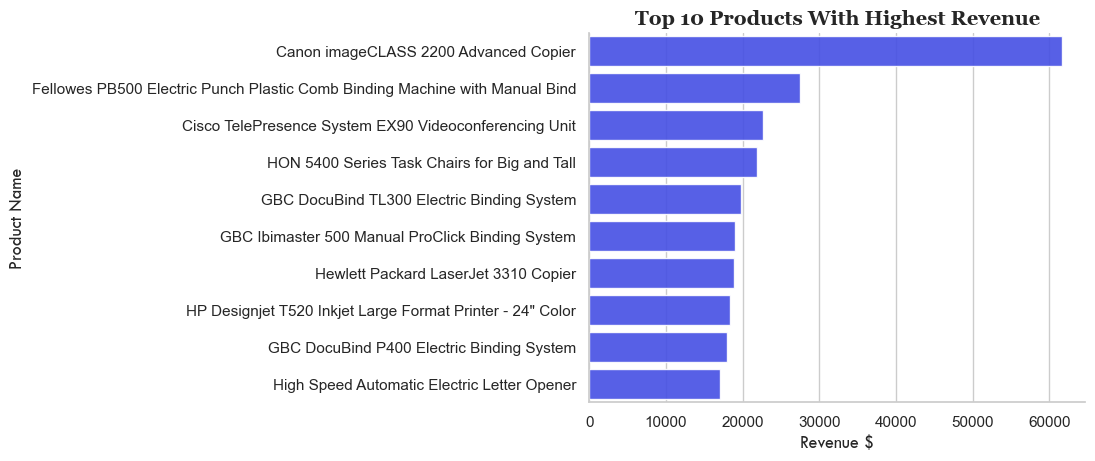

In [44]:
top_10_products = sales.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(top_10_products, x='sales', y='product_name',color='#2a38ff', alpha=0.9)
sns.despine()
plt.title('Top 10 Products With Highest Revenue', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Product Name', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __2. Which Segment has the highest sales?__

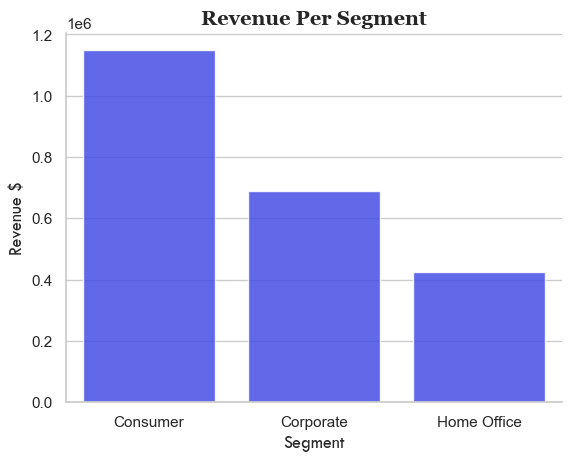

In [45]:
highest_segment = sales.groupby('segment')[['sales']].sum().sort_values('sales', ascending=False).reset_index()
sns.barplot(highest_segment, x='segment', y='sales',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('Revenue Per Segment', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Segment', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __3. Which Region has the highest sales?__

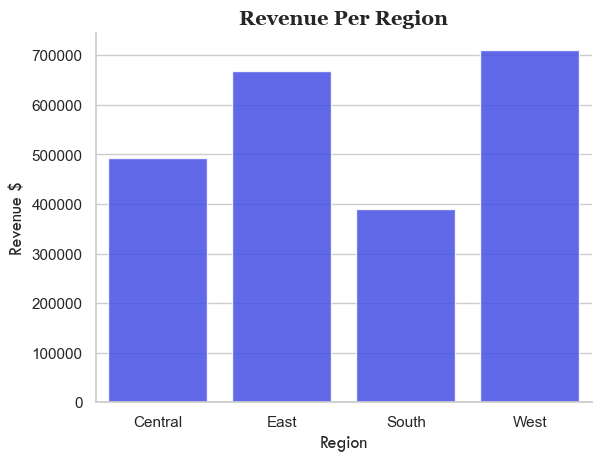

In [46]:
highest_region = sales.groupby('region')[['sales']].sum().sort_values('sales', ascending=False).reset_index()
sns.barplot(highest_region, x='region', y='sales',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('Revenue Per Region', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Region', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __4. Which shipping mode has the highest sales?__

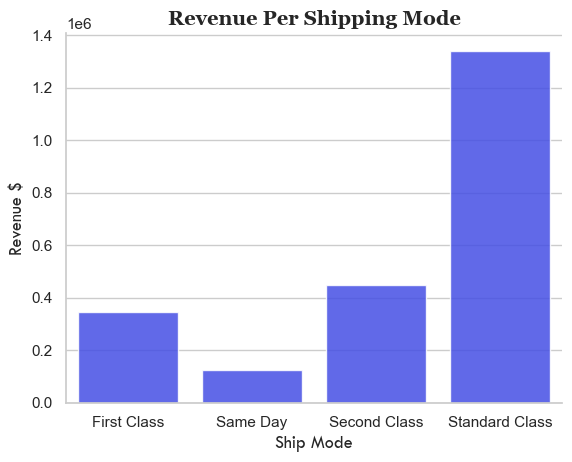

In [47]:
highest_ship_mode = sales.groupby('ship_mode')[['sales']].sum().sort_values('sales', ascending=False).reset_index()
sns.barplot(highest_ship_mode, x='ship_mode', y='sales',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('Revenue Per Shipping Mode', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Ship Mode', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __5. Most valuable customer in each year?__

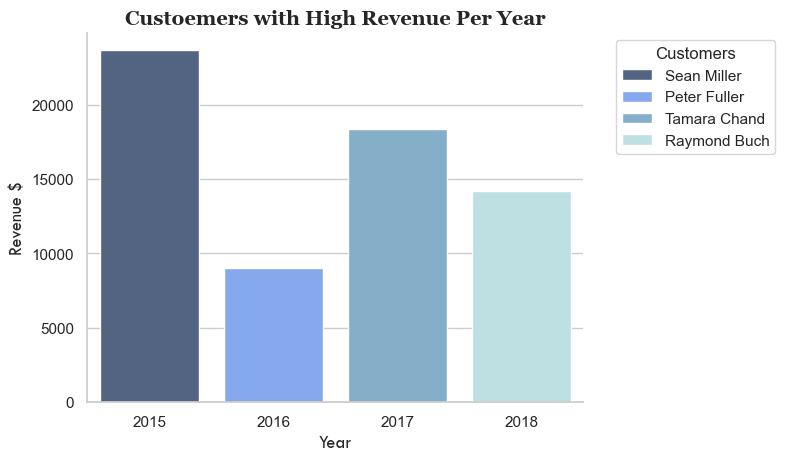

In [48]:
top_customers = sales.groupby(['order_year','customer_name'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False])
mask = top_customers.groupby('order_year')['sales'].idxmax()
top_customers = top_customers.loc[mask].reset_index()
sns.barplot(top_customers, x='order_year', y='sales',hue='customer_name', alpha=1, palette=['#4A628A','#75A3FF', '#7AB2D3','#B9E5E8'])
sns.despine()
plt.title('Custoemers with High Revenue Per Year', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Year', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.legend(title="Customers",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### __6. Top selling product each year in each region?__

In [49]:
top_selling_products = sales.groupby(['order_year','region','product_name'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False])
mask = top_selling_products.groupby(['order_year','region'])['sales'].idxmax()
top_selling_products.loc[mask].reset_index()

,order_year,region,product_name,sales
0,2015,Central,Lexmark MX611dhe Monochrome Laser Printer,11219.93
1,2015,East,HP Designjet T520 Inkjet Large Format Printer ...,6999.96
2,2015,South,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,2015,West,High Speed Automatic Electric Letter Opener,8187.65
4,2016,Central,Canon PC1060 Personal Laser Copier,4899.93
5,2016,East,"Riverside Palais Royal Lawyers Bookcase, Royal...",11717.03
6,2016,South,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.95
7,2016,West,Zebra GX420t Direct Thermal/Thermal Transfer P...,5521.88
8,2017,Central,Canon imageCLASS 2200 Advanced Copier,17499.95
9,2017,East,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93


### __7. What are top revenue generating states each year?__

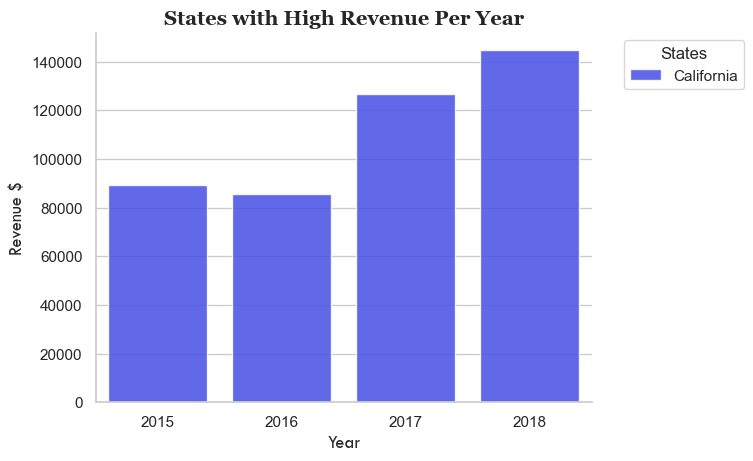

In [50]:
top_state = sales.groupby(['order_year','state'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False])
mask = top_state.groupby('order_year')['sales'].idxmax()
res = top_state.loc[mask].reset_index()
sns.barplot(res, x='order_year', y='sales',hue='state', alpha=0.85, palette=['#2a38ff'])
sns.despine()
plt.title('States with High Revenue Per Year', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Year', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.legend(title="States",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### __8. What are top revenue generating cities overall?__

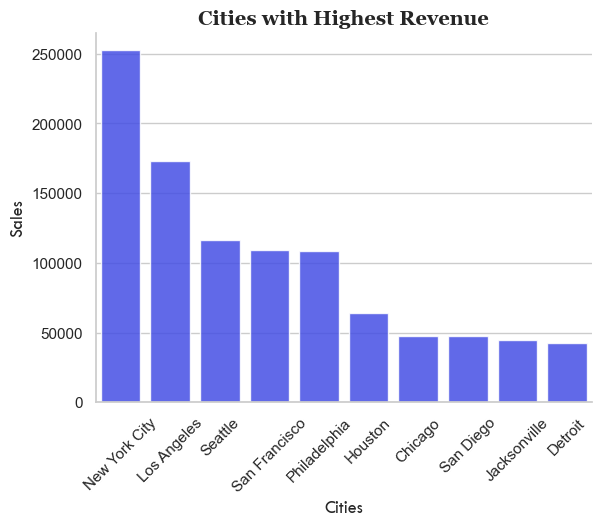

In [51]:
top_cities = sales.groupby('city')[['sales']].sum().sort_values('sales', ascending=False).head(10).reset_index()
sns.barplot(top_cities, x='city', y='sales',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('Cities with Highest Revenue', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Cities', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Sales', fontsize=13,  fontname = 'Tw Cen MT')
plt.xticks(rotation=45)
plt.show()

### __9. What is the top revenue generating city each year?__

In [52]:
top_cities_per_year = sales.groupby(['order_year','city'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False])
mask = top_cities_per_year.groupby('order_year')['sales'].idxmax()
top_cities_per_year.loc[mask].reset_index()

,order_year,city,sales
0,2015,New York City,44361.08
1,2016,New York City,67506.08
2,2017,Los Angeles,55273.07
3,2018,New York City,86788.76


### __11. What is top revenue generating shipping mode each year?__

In [53]:
top_ship_mode_per_year = sales.groupby(['order_year','ship_mode'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False])
mask = top_ship_mode_per_year.groupby('order_year')['sales'].idxmax()
top_ship_mode_per_year.loc[mask].reset_index()

,order_year,ship_mode,sales
0,2015,Standard Class,302271.19
1,2016,Standard Class,278923.52
2,2017,Standard Class,367823.52
3,2018,Standard Class,391531.80


### __11. What is revenue share of each product category overall?__

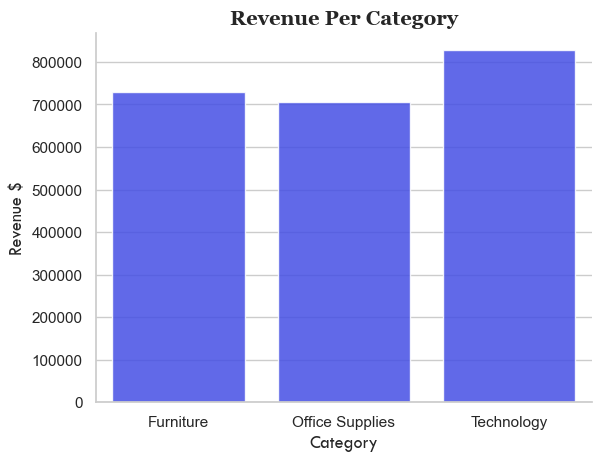

In [54]:
top_categories = sales.groupby('category')[['sales']].sum().sort_values('sales', ascending=False).reset_index()
sns.barplot(top_categories, x='category', y='sales',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('Revenue Per Category', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Category', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('Revenue $', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __11. What is revenue share of each product category each year?__

In [55]:
top_category_per_year = sales.groupby(['order_year','category'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False]).reset_index()
mask = top_category_per_year.groupby('order_year')['sales'].idxmax()
top_category_per_year.loc[mask]

,order_year,category,sales
0,2015,Technology,173865.52
3,2016,Furniture,164053.84
6,2017,Technology,221961.98
9,2018,Technology,269370.67


### __12. What is average delivery time for each shipping mode?__

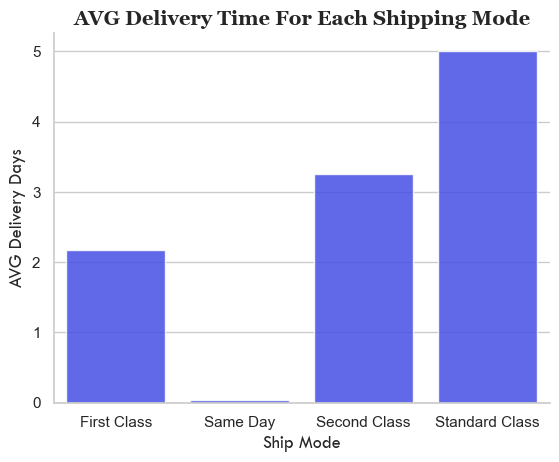

In [56]:
avg_delivery_per_shipping_mode = sales.groupby(['ship_mode'])[['delivery_days']].mean().round(2).reset_index()
avg_delivery_per_shipping_mode
sns.barplot(avg_delivery_per_shipping_mode, x='ship_mode', y='delivery_days',color='#2a38ff', alpha=0.85)
sns.despine()
plt.title('AVG Delivery Time For Each Shipping Mode', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Ship Mode', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('AVG Delivery Days', fontsize=13,  fontname = 'Tw Cen MT')
plt.show()

### __13. What is average delivery time in each year in each region?__

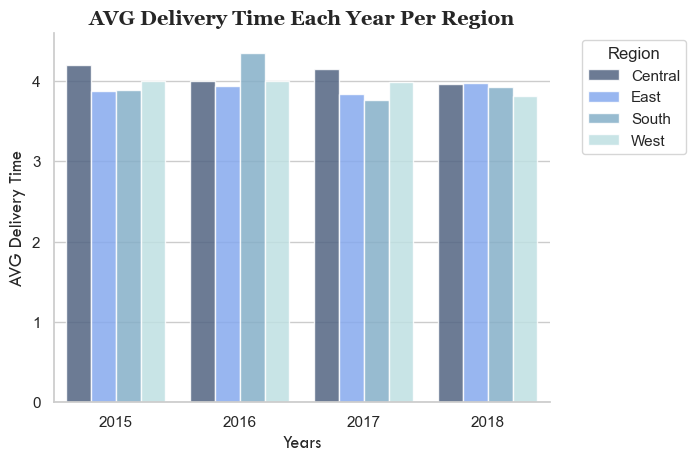

In [57]:
avg_delivery_per_year_per_region = sales.groupby(['order_year','region'])[['delivery_days']].mean().round(2).reset_index()
sns.barplot(avg_delivery_per_year_per_region, x='order_year', y='delivery_days',hue='region', alpha=0.85, 
           palette=['#4A628A','#75A3FF', '#7AB2D3','#B9E5E8'])
sns.despine()
plt.title('AVG Delivery Time Each Year Per Region', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Years', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('AVG Delivery Time', fontsize=13,  fontname = 'Tw Cen MT')
plt.legend(title="Region",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,4.6)
plt.show()

### __14. What is average delivery time in each year for each product category?__

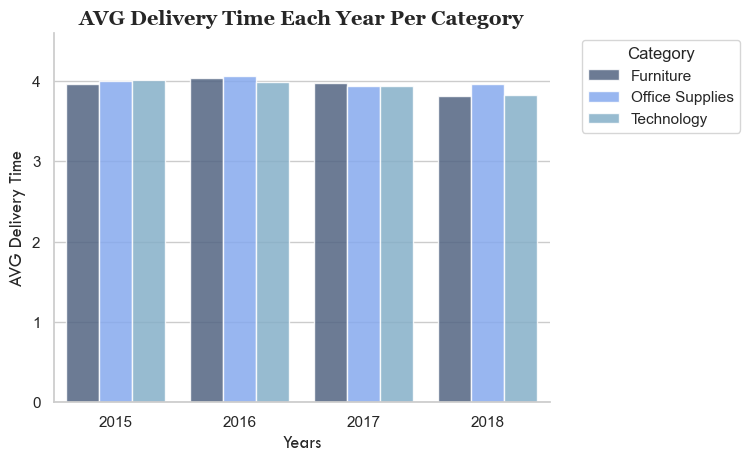

In [58]:
avg_delivery_per_year_per_cat = sales.groupby(['order_year','category'])[['delivery_days']].mean().round(2).reset_index()
sns.barplot(avg_delivery_per_year_per_cat, x='order_year', y='delivery_days',hue='category', alpha=0.85, 
            palette=['#4A628A','#75A3FF', '#7AB2D3'])
sns.despine()
plt.title('AVG Delivery Time Each Year Per Category', fontdict={'fontsize': 14.5, 'fontweight': 'bold', 'fontname': 'Georgia'})
plt.xlabel('Years', fontsize=13,  fontname = 'Tw Cen MT')
plt.ylabel('AVG Delivery Time', fontsize=13,  fontname = 'Tw Cen MT')
plt.legend(title="Category",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,4.6)
plt.show()

### __15. What are the underperforming products each year?__

In [59]:
low_sale_products = sales.groupby(['order_year','product_name'])[['sales']].sum().sort_values(['order_year','sales'], ascending=[True, False]).reset_index()
mask = low_sale_products.groupby('order_year')['sales'].idxmin()
low_sale_products.loc[mask]

,order_year,product_name,sales
1197,2015,Avery Round Ring Poly Binders,0.85
2418,2016,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",0.98
3769,2017,Newell 310,1.41
5273,2018,Hoover Commercial Lightweight Upright Vacuum,1.39


### __15. What are the underperforming products across all the regions?__

In [60]:
sales_per_product_region = sales.groupby(['product_name', 'region'])['sales'].sum().reset_index()
avg_sales_per_region = sales_per_product_region.groupby('region')['sales'].mean().reset_index()
products = sales_per_product_region.merge(avg_sales_per_region, on='region',suffixes=('', '_avg'))
products = products[products['sales'] < products['sales_avg']]
underperformers = products['product_name'].value_counts()
underperforming_products = underperformers[underperformers == len(sales['region'].unique())]
low_sale_products_each_region = pd.Series(underperforming_products.index)
low_sale_products_each_region.reset_index().set_index('index')

,product_name
index,
0,"""While you Were Out"" Message Book, One Form pe..."
1,Newell 346
2,Nokia Lumia 521 (T-Mobile)
3,Newell Chalk Holder
4,Newell 351
...,...
1142,Advantus Panel Wall Acrylic Frame
1143,American Pencil
1144,Advantus Panel Wall Certificate Holder - 8.5x11


### __16. What are prefered product categories and demographic characteristics of high value customers?__

In [61]:
top_customers_each_year = sales.groupby(['order_year','customer_name'], as_index=False)['sales'].sum().sort_values(['order_year', 'sales'], ascending=[True, False])
temp = top_customers_each_year.groupby('order_year', as_index=False).head()
df = sales.merge(temp, left_index=True, right_index=True).reset_index()
result = df[['order_year_y','customer_name_y','category','sub_category','product_name','region','state','city','sales_y']].rename(columns={'order_year_y':'order_year','customer_name_y':'customer_name','sales_y':'sales'})
result

,order_year,customer_name,category,sub_category,product_name,region,state,city,sales
0,2015,Becky Martin,Office Supplies,Paper,"Eureka Recycled Copy Paper 8 1/2"" x 11"", Ream",South,Virginia,Alexandria,10539.90
1,2015,Ken Lonsdale,Office Supplies,Supplies,Martin-Yale Premier Letter Opener,East,Pennsylvania,Philadelphia,8694.63
2,2015,Sanjit Chand,Office Supplies,Appliances,Harmony Air Purifier,Central,Illinois,Chicago,12876.48
3,2015,Sean Miller,Office Supplies,Binders,Fellowes Presentation Covers for Comb Binding ...,Central,Illinois,Chicago,23661.24
4,2015,Tom Boeckenhauer,Furniture,Chairs,"Situations Contoured Folding Chairs, 4/Set",South,Tennessee,Bristol,8137.26
5,2016,Christopher Martinez,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,East,New Jersey,Hackensack,6682.26
6,2016,Fred Hopkins,Office Supplies,Paper,Xerox 1956,East,New York,New York City,6056.09
7,2016,Keith Dawkins,Furniture,Furnishings,Regeneration Desk Collection,West,Colorado,Denver,7039.04
8,2016,Natalie Webber,Office Supplies,Storage,Akro-Mils 12-Gallon Tote,Central,Oklahoma,Tulsa,5511.31
9,2016,Peter Fuller,Office Supplies,Art,Newell 320,East,Ohio,Lancaster,9022.32


## __Time Series Analysis__

In [62]:
# Making Time Series DataFrame
ts_df = sales[['order_date','order_month','order_year','ship_date','ship_month','ship_year','sales']]
ts_df.head(3)

,order_date,order_month,order_year,ship_date,ship_month,ship_year,sales
row_id,,,,,,,
0,2015-01-03,Jan,2015,2015-01-07,Jan,2015,16.45
1,2015-01-04,Jan,2015,2015-01-08,Jan,2015,11.78
2,2015-01-04,Jan,2015,2015-01-08,Jan,2015,272.74


In [63]:
print('Order Date Description\n') 
print(ts_df['order_date'].describe())
print('\nShip Date Description\n')
print(ts_df['ship_date'].describe()) 

Order Date Description

count                             9799
mean     2017-05-01 07:02:29.525461760
min                2015-01-03 00:00:00
25%                2016-05-24 12:00:00
50%                2017-06-26 00:00:00
75%                2018-05-15 00:00:00
max                2018-12-30 00:00:00
Name: order_date, dtype: object

Ship Date Description

count                             9799
mean     2017-05-05 06:06:30.162261504
min                2015-01-07 00:00:00
25%                2016-05-28 00:00:00
50%                2017-06-29 00:00:00
75%                2018-05-19 00:00:00
max                2019-01-05 00:00:00
Name: ship_date, dtype: object


In [64]:
# set order_date as index for ease of time series analysis
ts_df.set_index('order_date', inplace = True)

In [65]:
# to study sales over time
data = ts_df[['sales']]
data.head(3)

,sales
order_date,
2015-01-03,16.45
2015-01-04,11.78
2015-01-04,272.74


In [66]:
# total sales over the years 2015-2018
fig = px.line(data, x=data.index, y='sales', labels={'order_date': 'Order Date', 'sales': 'Sales Amount'})
fig.update_traces(line=dict(color='rgba(42, 56, 255, 0.7)', width=2),hovertemplate='Order Date: %{x}: <br>Sales: %{y}')
fig.update_layout(title={'text':f"Total Sales Over 2015-2018", 'font': {
            'family': "Georgia",'size': 20, 'color': "black", 'weight':'bold'}}, width=1100, height=400,
                xaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
                yaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'))

In [67]:
# Total Revenue Per Year Per Month
years = sorted(sales['order_year'].unique())
months = sales['order_month'].unique().tolist()
months.insert(0, 'Overall')
@widgets.interact(Year=years, Month=months)
def ts_plot(Year, Month):
    plot_data = pd.DataFrame(ts_df['sales'].resample('D').mean()).interpolate()
    month_num = list(zip(months, [0,1,2,3,4,5,6,7,8,9,10,11,12]))
    if Month == 'Overall':
        filtered_data = plot_data.loc[str(Year)].reset_index()
        fig = px.line(filtered_data, x='order_date', y='sales', labels={'order_date': 'Order Date', 'sales': 'Revenue $ (Sales)'})
    else:
        month = [x[1] for x in month_num if x[0]==Month][0]
        val = str(f'{month}-{Year}')
        filtered_data = plot_data.loc[val].reset_index()
        fig = px.line(filtered_data, x='order_date', y='sales',markers=True, labels={'order_date': 'Order Date', 'sales': 'Revenue $ (Sales)'})
        
    fig.update_traces(line=dict(color='rgba(42, 56, 255 , 0.7)', width=2),hovertemplate='Order Date: %{x}: <br>Sales: %{y}')
    fig.update_layout(title={'text':f"Sales Over 2015-2018", 'font': {
            'family': "Georgia",'size': 20, 'color': "black", 'weight':'bold'}}, width=1100, height=400,
                    xaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
                    yaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'))
    fig.show()

interactive(children=(Dropdown(description='Year', options=(2015, 2016, 2017, 2018), value=2015), Dropdown(des…

### __Time Series Components Analysis__
- __Trend__
- __Seasonality__
- __Residual__
#### __With Respect To__:
- __Daily Basis__
- __Weekly Basis__
- __Monthly Basis__
- __Quaterly Basis__
- __Half Year Basis__
- __Yearly Basis__

### __Daily Analysis__

In [68]:
# Mutlivariate TSC Analysis
durations = ['Daily', 'Weekly', 'Monthly', 'Quaterly', 'Half Year', 'Yearly']
@widgets.interact(Duration=durations)
def ts_component_analysis(Duration):
    duration_tag = list(zip(durations, ['D','W','M','Q','6M','Y']))
    tag = [x[1] for x in duration_tag if x[0]==Duration][0]
    cmp_data = pd.DataFrame(data['sales'].resample(tag).mean()).interpolate()

    decomposition = sm.tsa.seasonal_decompose(cmp_data, model='additive')

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    observed = decomposition.observed

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                       subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

    fig.add_trace(go.Scatter(x=observed.index, y=observed, mode='lines', name='Observed'), row=1, col=1)
    fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'), row=2, col=1)
    fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)
    fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual'), row=4, col=1)

    fig.update_layout(height=800, width=1100, title_text="Time Series Decomposition Analysis of Sales", showlegend=False,
                     title_font=dict(size=20, family='Georgia', weight='bold'))
    fig.show()

interactive(children=(Dropdown(description='Duration', options=('Daily', 'Weekly', 'Monthly', 'Quaterly', 'Hal…

## __Time Series Forecasting__

In [69]:
# getting data ready
forecast_data = pd.DataFrame(data['sales'].resample('D').mean().interpolate())
forecast_data.head(3)

,sales
order_date,
2015-01-03,16.45
2015-01-04,96.02
2015-01-05,19.54


### __Augmented Dicky Fuller Test (Test For Stationarity)__
- A series is said to be __Stationary__,  when its mean and variance do not change over time. 
- ADF is a statistical test also called a unit root test.The base of unit root test is that it helps in determining how strongly a time series is defined by a trend.
- The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary. The alternate hypothesis is the time ries is stationary.

- __Null Hypothesis(Ho):__ Time series is not stationary
- __Alternate Hypothesis(Ha):__ Time series is stationary
This result is interpreted using the p-value from the test.

- __p-value > 0.05(alpha):__ Fails to reject the null hypothesis (Ho), the data has a unit root and is non-stationary.
- __p-value <= 0.05(alpha):__ Rejects the null hypothesis (Ho), the data does not have a unit root and is stationary.

In [70]:
#  Augmented Dicky Fuller test
def adf_test(df):
    adftest = adfuller(df, autolag = 'AIC')
    print("1. ADF : ",adftest[0])
    print("2. P-Value : ", adftest[1])
    print("3. Num Of Lags : ", adftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", adftest[3])
    print("5. Critical Values :")
    for key, val in adftest[4].items():
        print("\t",key, ": ", val)
        if adftest[0] < val:
            print('Ho Rejected. Time Series is Stationary')
        else:
            print('Ho Accepted. Time Series is not Stationary')

In [71]:
adf_test(forecast_data['sales'])

1. ADF :  -20.8101586721787
2. P-Value :  0.0
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1455
5. Critical Values :
	 1% :  -3.4348523191002123
Ho Rejected. Time Series is Stationary
	 5% :  -2.8635284734563364
Ho Rejected. Time Series is Stationary
	 10% :  -2.567828646449617
Ho Rejected. Time Series is Stationary


### __Forecasting with SARIMA Model__

In [72]:
# setting paramter values for model
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [73]:
#Finding the best combination of seasonal parameters for SARIMA
for parameters in pdq: 
    for seasonal_param in seasonal_pdq_comb:
        try:
            model = SARIMAX(forecast_data, order=parameters, seasonal_param_order=seasonal_param,
                            enforce_stationarity=False, enforce_invertibility=False) 
            print(f'SARIMA{parameters} x {seasonal_param}12 - AIC:{results.aic}')
        except:
            continue     

In [74]:
# fitting model with best parameters
model = SARIMAX(forecast_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12),
                    enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary()) 

                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1458
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood              -10292.523
Date:                             Tue, 22 Oct 2024   AIC                          20593.046
Time:                                     15:35:20   BIC                          20614.113
Sample:                                 01-03-2015   HQIC                         20600.913
                                      - 12-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2282      0.013     17.255      0.000       0.202       0.254
ma.L1         -1.0000      

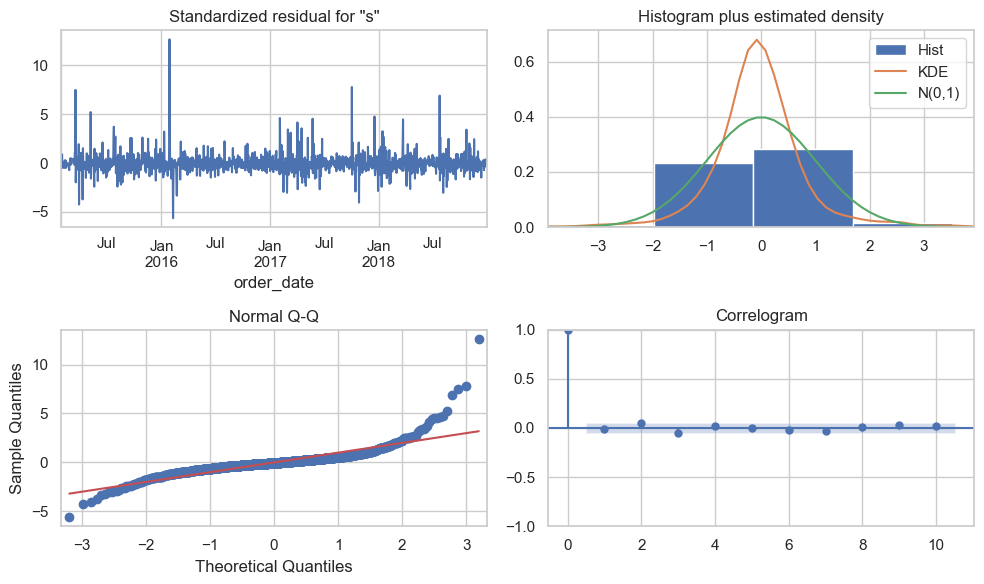

In [75]:
# Plotting Model Evaluations
results.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [76]:
# Evaluating model with 6 months sales data with prediction values
start_date = pd.to_datetime('2018-07-04')
pred = results.get_prediction(start=start_date, dynamic=False)
pred_val = pred.conf_int()
observed = forecast_data[forecast_data.index >= start_date][-180:]

fig = go.Figure()
fig = px.line(observed, x=observed.index, y='sales', labels={'x': 'Date', 'y': 'Sales'}, title='Observed vs. Predicted Sales')
fig.add_scatter(x=pred.predicted_mean.index, y=pred.predicted_mean, mode='lines', name='Forecast', line=dict(color='orange'))

# confidence interval fill
fig.add_trace(go.Scatter(x=pred_val.index, y=pred_val.iloc[:, 0], mode='lines', name='Lower Bound',
    line=dict(color='rgba(0,0,0,0)'), showlegend=False))
fig.add_trace(go.Scatter(x=pred_val.index, y=pred_val.iloc[:, 1], mode='lines', name='Upper Bound', line=dict(color='rgba(0,0,0,0)'), 
    fill='tonexty', fillcolor='rgba(0,0,0,0.12)',showlegend=False))

fig.update_layout(title='Observed vs. Predicted Sales',
    title_font=dict(size=20, family='Georgia', weight='bold'),
    xaxis_title='Date', yaxis_title='Sales',
    xaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
    yaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
    legend=dict(x=0.1, y=1.1, orientation='h'))
fig.show()

In [77]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(pred.predicted_mean, observed)
rmse = np.sqrt(mse)
print(f'MSE of the forecasts is {round(rmse, 2)}')

MSE of the forecasts is 304.0


In [78]:
# Making future sales forecasts for next quater time span (Jan-Mar 2019)
forecast = results.forecast(steps=90).astype('float').round(2)
forecasted_df = forecast.reset_index().rename(columns={'index':'prediction_date','predicted_mean':'predicted_sales'})
fig = px.line(forecasted_df, x='prediction_date', y='predicted_sales',
    labels={'prediction_date': 'Prediction Date', 'predicted_sales': 'Predicted Sales'},
    title='Predicted Sales For Next Quarter (Jan-Mar 2019)',)
fig.update_layout(
    title_font=dict(size=20, family='Georgia', color='black', weight='bold'),
    xaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
    yaxis_title_font=dict(size=18, family='Tw Cen MT', weight='bold'),
    width=1100,
    height=400,
)
fig.show()

## __Hypothesis Testing__
Following are some key statistical tests performed on the dataset. These tests aim to provide insights about relationships between features, their impact etc .

### __1. Sales / Product Category Hypothesis__
#### __Test:__ One-way ANOVA to compare sales across different product categories.
__Null Hypothesis (H₀):__
  <br>There is no significant difference in sales between different product categories.
<br>__Alternative Hypothesis (H₁):__
  <br>There is a significant difference in sales between different product categories.

In [79]:
# One-way ANOVA: Comparing sales across product categories
model = ols('sales ~ C(category)', sales).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(category),1.954825e+08,2.0,262.141259,1.245999e-111
Residual,3.652509e+09,9796.0,NaN,NaN


#### __Results from ANOVA:__
- __F-statistic:__ 262.141259 (very large value).
- __p-value:__ 1.245999e-111 (extremely small, close to zero).
### __Conclusion:__
Since the p-value is significantly less than __0.05(α)__, we reject the null hypothesis. This means:
- There is a significant difference in sales between different product categories.
- Some product categories are likely contributing more to sales than others. The effect of product categories on sales is statistically significant.

### __2. Customer Segment Hypothesis__
#### __Test:__ Two-sample t-test comparing sales between customer segments 
#### __Note__: _Here long-term and new customers are being considered_
__Null Hypothesis (H₀):__ <br>There is no significant difference in sales based on customer segments.
<br>__Alternative Hypothesis (H₁):__ <br>There is a significant difference in sales based on customer segments.

In [80]:
# Assuming long-term customers are those with more than 10 orders
long_term_customers = sales.groupby('customer_id').filter(lambda x: len(x) > 10)['sales']
new_customers = sales.groupby('customer_id').filter(lambda x: len(x) <= 10)['sales']

t_stat, p_value = stats.ttest_ind(long_term_customers, new_customers, equal_var=False)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 1.3110331815911525
P-value: 0.18990405608296082


#### __Results from ANOVA:__
- __T-statistic:__ 1.311033.
- __p-value:__ 0.18990.
### __Conclusion:__
 Since the p-value is greater than 0.05(α), we can not reject the null hypothesis. This means:
- Based on your results, you can conclude that there is no statistically significant difference in the sales amounts between long-term customers and new customers at the significance level.
- This means that the sales of long-term customers are not significantly higher (or lower) than those of new customers based on given sample.

# 📊 __Analysis Report__

## 🔑__Key Insights:__
Following are some important key insights retreived through data analysis on given sales dataset.
### 📈__Skewed Sales Distribution:__ 
- The sales data reveals a highly positively skewed distribution.
- Products priced in the range of $10–$1000 are more frequently purchased by customers compared to high-priced products (above $1000), which have a significantly lower purchase rate.
- This suggests that lower-priced products are more attractive to a broader customer base.
### 🚚__Delivery Preferences & Performance:__
- Most products were delivered within 4 to 5 days, with the majority of customers choosing Standard Class shipping (3-7 days delivery) over Second Class (2-day delivery).
- There is a noticeable clustering of sales with 4-day delivery times, predominantly in the Standard Class.
- Interestingly, Technology and Home Office products tend to receive faster deliveries, indicating possible prioritization for these categories.
### 👥__Customer Demographics & Segments:__
- A significant proportion of the customer base consists of general consumers, contributing heavily to overall sales.
- Statistical tests reveal that there is no significant difference in sales between long-term and new customers, indicating that the sales behavior is consistent across customer segments.
### 🌎__Top-Performing Product Categories & Regions:__ 
- Office Supplies dominate the product categories, with subcategories such as Binders, Paper, and Furnishings leading in sales volume.
-  Technology products, particularly Phones and Chairs, emerge as the most profitable subcategories.
-  Sales are notably concentrated in California, with New York City, Los Angeles, San Francisco, and Philadelphia leading city-based sales.
-  A strong profit margin is observed in states like California, New York, and Texas, especially in the West region.

### ⏳__Delivery Time Analysis by Region:__ 
- Delivery times vary across different states. For instance, states such as North Dakota and West Virginia experience shorter delivery times (less than 3.5 days), while South Dakota, New Jersey, and New Mexico face longer delivery times (4.4 days or more).
- This reflects potential logistical inefficiencies in certain regions.

### 🔍__Statistical Analysis Findings:__
- A one-way ANOVA test confirmed that there is a significant difference in sales across different product categories, with some categories contributing more to the overall sales.
- A two-sample t-test between long-term and new customers showed no significant difference in sales between the two segments.

## 📌 __Recommendations:__
### 💵 __Focus on Lower-Priced Products:__ 
- Since most sales come from products priced between $10–$1000, consider expanding this product range or offering more promotions in this segment to further boost sales.

### 🚀 __Improve Delivery in Key Regions:__ 
- Enhance logistics in states with longer delivery times like New Jersey and South Dakota.
- Offering discounted or faster shipping in these areas could improve customer satisfaction and increase sales.

### 📱 __Promote Profitable Products:__
- Focus on high-performing categories like Technology (especially Phones) by boosting marketing and ensuring stock availability.
- Expanding the Office Supplies category could also help increase overall sales volume.

### 🛍️ __Offer More Shipping Options:__ 
- With a high preference for Standard Class, introduce personalized delivery options such as same-day or faster shipping for popular products like Technology and Furniture to attract customers who value speed.

### 🏙️ __Target High-Growth Regions:__
- Focus marketing and loyalty programs in top-performing states like California, New York, and Texas to further strengthen sales.
- Identify and target underperforming regions for growth opportunities.
This report highlights key insights and actionable recommendations for boosting sales, optimizing logistics, and improving customer satisfaction to help achieve business goals.
<div style="text-align: center;">
    ★★★★★★★★★★★★★★★★★★★★★★★★
</div>
